In [40]:
# Import our dependencies

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import our input dataset
df = pd.read_csv('dataset.csv')
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [41]:
print(df.columns.values)

['encounter_id' 'patient_id' 'hospital_id' 'hospital_death' 'age' 'bmi'
 'elective_surgery' 'ethnicity' 'gender' 'height' 'hospital_admit_source'
 'icu_admit_source' 'icu_id' 'icu_stay_type' 'icu_type' 'pre_icu_los_days'
 'readmission_status' 'weight' 'albumin_apache' 'apache_2_diagnosis'
 'apache_3j_diagnosis' 'apache_post_operative' 'arf_apache'
 'bilirubin_apache' 'bun_apache' 'creatinine_apache' 'fio2_apache'
 'gcs_eyes_apache' 'gcs_motor_apache' 'gcs_unable_apache'
 'gcs_verbal_apache' 'glucose_apache' 'heart_rate_apache'
 'hematocrit_apache' 'intubated_apache' 'map_apache' 'paco2_apache'
 'paco2_for_ph_apache' 'pao2_apache' 'ph_apache' 'resprate_apache'
 'sodium_apache' 'temp_apache' 'urineoutput_apache' 'ventilated_apache'
 'wbc_apache' 'd1_diasbp_invasive_max' 'd1_diasbp_invasive_min'
 'd1_diasbp_max' 'd1_diasbp_min' 'd1_diasbp_noninvasive_max'
 'd1_diasbp_noninvasive_min' 'd1_heartrate_max' 'd1_heartrate_min'
 'd1_mbp_invasive_max' 'd1_mbp_invasive_min' 'd1_mbp_max' 'd1_mbp_mi

In [42]:
print(len(df))


91713


In [10]:
## df = df.drop(['encounter_id', 'patient_id', 'hospital_id', 'apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob', 'd1_temp_min'], axis=1)
## df = df[df.columns.drop(list(df.filter(regex='h1')))]
## df = df[df.columns.drop(list(df.filter(regex='apache')))]

In [43]:
df2 = df[['elective_surgery', 'hospital_death',
 'd1_heartrate_min', 'd1_heartrate_max',
 'd1_sysbp_min', 'd1_sysbp_max',
 'd1_diasbp_max', 'd1_diasbp_min',
  'arf_apache', 'immunosuppression',
  'gcs_verbal_apache', 'gcs_motor_apache', 
  'gcs_eyes_apache', 'bmi', 
  'weight', 'age', 
  'd1_glucose_min', 'd1_glucose_max', 
  ]].copy()

In [44]:
df2 = df2.sample(frac=0.1, replace=True, random_state=1)

In [45]:
df2.dropna(inplace=True)
X = df2.drop('hospital_death', axis=1)
X = pd.get_dummies(X)
y = df2['hospital_death'] != 1

In [46]:
X

,elective_surgery,d1_heartrate_min,d1_heartrate_max,d1_sysbp_min,d1_sysbp_max,d1_diasbp_max,d1_diasbp_min,arf_apache,immunosuppression,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,bmi,weight,age,d1_glucose_min,d1_glucose_max,gender_F,gender_M
77708,0,71.0,109.0,130.0,188.0,113.0,59.0,0.0,0.0,4.0,5.0,4.0,27.089947,67.2,64.0,152.0,272.0,1,0
5192,0,72.0,89.0,79.0,133.0,81.0,37.0,0.0,0.0,5.0,6.0,4.0,28.755829,83.3,76.0,82.0,96.0,1,0
50057,0,60.0,107.0,93.0,155.0,93.0,54.0,0.0,0.0,5.0,6.0,4.0,35.274872,108.4,52.0,118.0,178.0,0,1
73349,0,61.0,97.0,121.0,144.0,72.0,67.0,0.0,0.0,5.0,6.0,4.0,39.728079,132.9,28.0,126.0,126.0,0,1
21440,0,101.0,121.0,121.0,167.0,120.0,88.0,0.0,0.0,5.0,6.0,4.0,22.714002,54.5,30.0,82.0,404.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32169,1,38.0,92.0,97.0,151.0,98.0,58.0,0.0,0.0,5.0,6.0,3.0,20.677961,59.9,54.0,100.0,124.0,1,0
60786,1,59.0,93.0,80.0,132.0,56.0,23.0,0.0,0.0,5.0,6.0,4.0,41.038233,108.5,66.0,113.0,347.0,1,0
64166,0,60.0,95.0,119.0,164.0,125.0,68.0,0.0,0.0,5.0,6.0,4.0,47.304602,161.9,46.0,98.0,154.0,0,1
27758,0,60.0,66.0,103.0,129.0,88.0,62.0,0.0,0.0,5.0,6.0,4.0,32.075913,96.0,69.0,114.0,114.0,1,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9296430419037766


In [49]:
feature_importances = clf.feature_importances_

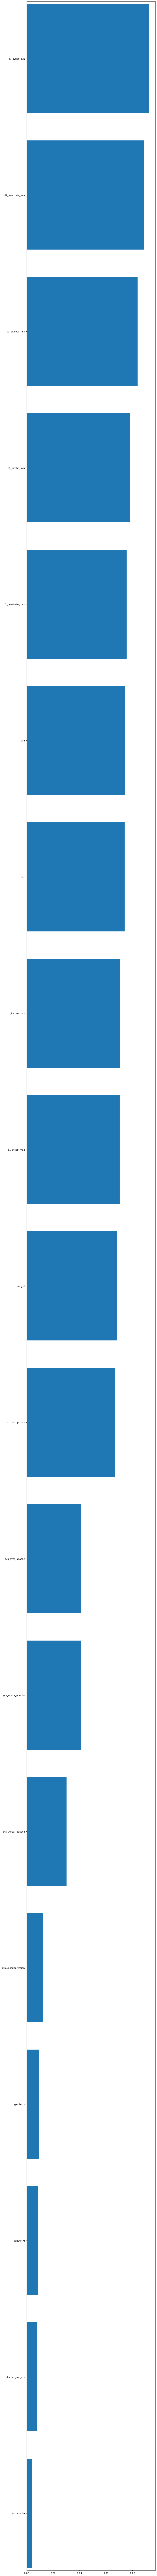

In [50]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [51]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [52]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

c:\Users\baseb\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [53]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9230636536139383
Testing Score: 0.9187790998448008


In [54]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9208211143695014
Testing Score: 0.9198137609932747
